In [1]:
import sys

if "./" not in sys.path:
    sys.path.append("./")
from utils.share import *
import utils.config as config

import einops
import gradio as gr
import torch
from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from models.util import create_model, load_state_dict
from models.ddim_hacked import DDIMSampler

from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from annotator.uniformer import UniformerDetector
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from src.test.test_vimeo_img2img import process

/data/maryam.sana/anaconda3/envs/unicontrol/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/maryam.sana/anaconda3/envs/unicontrol/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


logging improved.
Enabled sliced_attention.
UniControlNet: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEffic

In [2]:
a_prompt = "best quality, extremely detailed"
n_prompt = "longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality"
num_samples = 1
image_resolution = 512
ddim_steps = 50
strength = 1
scale = 7.5
seed = 42
eta = 0.0
global_strength = 1

def get_recons_img(prompt, original_image,frame):
    pred = process(frame, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, strength, scale, seed, eta, global_strength)
    pred_img = pred[0][0]

    # Ensure the images are of the same size
    if original_image.shape != pred_img.shape:
        pred_img = cv2.resize(pred_img, (original_image.shape[1], original_image.shape[0]))

    # Calculate residue
    residue = original_image - pred_img

    return pred_img, residue, pred[1]

In [3]:
# Pick a random video and sequence
image_paths = ['data/00096_0576/im1.png', 'data/00096_0576/im2.png', 'data/00096_0576/im3.png', 'data/00096_0576/im4.png', 'data/00096_0576/im5.png', 'data/00096_0576/im6.png', 'data/00096_0576/im7.png']
print(image_paths)

prompt = 'a girl with black hair and black shirt standing infront grey and blue background '

original_images = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in image_paths]

['data/00096_0576/im1.png', 'data/00096_0576/im2.png', 'data/00096_0576/im3.png', 'data/00096_0576/im4.png', 'data/00096_0576/im5.png', 'data/00096_0576/im6.png', 'data/00096_0576/im7.png']


Global seed set to 42


Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873 0.55514455
 0.52153981 0.4881804  0.45523876 0.42288151 0.39126703 0.36

DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.27it/s]
Global seed set to 42


Saved prediction image: data/00096_0576/preds_kf/im1_pred.png
Saved residue image: data/00096_0576/residues_kf/im1_residue.png
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338


DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.24it/s]
Global seed set to 42


Saved prediction image: data/00096_0576/preds_kf/im2_pred.png
Saved residue image: data/00096_0576/residues_kf/im2_residue.png
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338


DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.21it/s]
Global seed set to 42


Saved prediction image: data/00096_0576/preds_kf/im3_pred.png
Saved residue image: data/00096_0576/residues_kf/im3_residue.png
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338


DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.20it/s]
Global seed set to 42


Saved prediction image: data/00096_0576/preds_kf/im4_pred.png
Saved residue image: data/00096_0576/residues_kf/im4_residue.png
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338


DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.18it/s]
Global seed set to 42


Saved prediction image: data/00096_0576/preds_kf/im5_pred.png
Saved residue image: data/00096_0576/residues_kf/im5_residue.png
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338


DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.18it/s]
Global seed set to 42


Saved prediction image: data/00096_0576/preds_kf/im6_pred.png
Saved residue image: data/00096_0576/residues_kf/im6_residue.png
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338


DDIM Sampler: 100%|█████████████████████████████| 50/50 [00:22<00:00,  2.18it/s]


Saved prediction image: data/00096_0576/preds_kf/im7_pred.png
Saved residue image: data/00096_0576/residues_kf/im7_residue.png


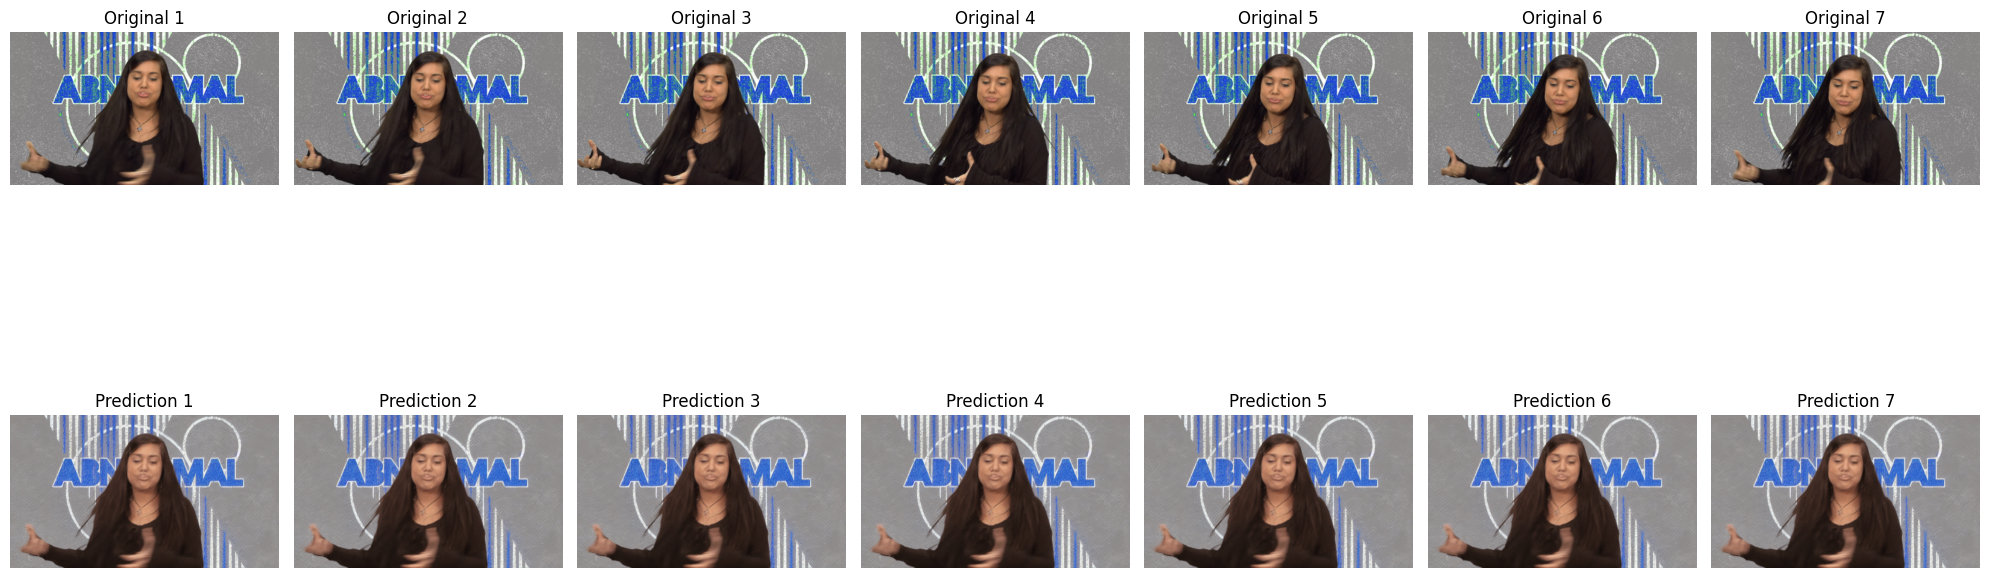

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from test_utils import calculate_metrics

# Define the folders for saving predictions and residues
pred_folder = 'data/00096_0576/preds_kf'
residue_folder = 'data/00096_0576/residues_kf'

# Ensure the directories exist
os.makedirs(residue_folder, exist_ok=True)
os.makedirs(pred_folder, exist_ok=True)

residues = []
predictions = []
key_frame = cv2.cvtColor(cv2.imread('data/00096_0576/im1.png.tfci.png'), cv2.COLOR_BGR2RGB)

for i, original_image in enumerate(original_images):
    
    pred_img, residue, maps = get_recons_img(prompt, original_image, key_frame)
    predictions.append(pred_img)
    residues.append(residue)

    # Save prediction image
    pred_image_path = os.path.join(pred_folder, f"im{i+1}_pred.png")
    cv2.imwrite(pred_image_path, cv2.cvtColor(pred_img, cv2.COLOR_RGB2BGR))
    print(f"Saved prediction image: {pred_image_path}")

    # Save residue image
    residue_image_path = os.path.join(residue_folder, f"im{i+1}_residue.png")
    cv2.imwrite(residue_image_path, cv2.cvtColor(residue, cv2.COLOR_RGB2BGR))
    print(f"Saved residue image: {residue_image_path}")

fig, axes = plt.subplots(2, len(original_images), figsize=(20, 10))
for i in range(len(original_images)):
    axes[0, i].imshow(original_images[i])
    axes[0, i].set_title(f"Original {i + 1}")
    axes[0, i].axis('off')
    axes[1, i].imshow(predictions[i])
    axes[1, i].set_title(f"Prediction {i + 1}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
psnr_values = []
mssim_values = []

for orig_img, pred_img in zip(original_images, predictions):
    # Convert to PIL images for metric calculation
    orig_pil = Image.fromarray(orig_img)
    pred_pil = Image.fromarray(pred_img)
    
    # Calculate metrics
    psnr_value, mssim_value = calculate_metrics(orig_pil, [pred_pil])
    
    # Store the results
    psnr_values.append(psnr_value)
    mssim_values.append(mssim_value)
    
    # print(f"PSNR: {psnr_value:.2f}, MS-SSIM: {mssim_value:.4f}")

# Calculate mean PSNR and MS-SSIM
mean_psnr = np.mean(psnr_values)
mean_mssim = np.mean(mssim_values)

print(f"\nMean PSNR: {mean_psnr:.2f}")
print(f"Mean MS-SSIM: {mean_mssim:.4f}")


Mean PSNR: 19.61
Mean MS-SSIM: 0.7698


In [13]:
## after video prediction we evaluate codec (meaning adding residue)

decompressed_residue_paths = glob.glob('data/00096_0576/residues_kf/*.png.tfci.png')
preds_paths = glob.glob('data/00096_0576/preds_kf/*.png')

residues = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in decompressed_residue_paths]
preds = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in preds_paths]

psnr_values = []
mssim_values = []
reconstructions = []
for pred,residue,orig_img in zip(preds,residues,original_images):
    recons_img = pred+residue
    orig_pil = Image.fromarray(orig_img)
    recons_pil = Image.fromarray(recons_img)
    reconstructions.append(recons_img)
    
    # Calculate metrics
    psnr_value, mssim_value = calculate_metrics(orig_pil, [recons_pil])
    
    # Store the results
    psnr_values.append(psnr_value)
    mssim_values.append(mssim_value)

# Calculate mean PSNR and MS-SSIM
mean_psnr = np.mean(psnr_values)
mean_mssim = np.mean(mssim_values)

print(f"\nMean PSNR: {mean_psnr:.2f}")
print(f"Mean MS-SSIM: {mean_mssim:.4f}")


Mean PSNR: 13.32
Mean MS-SSIM: 0.2643


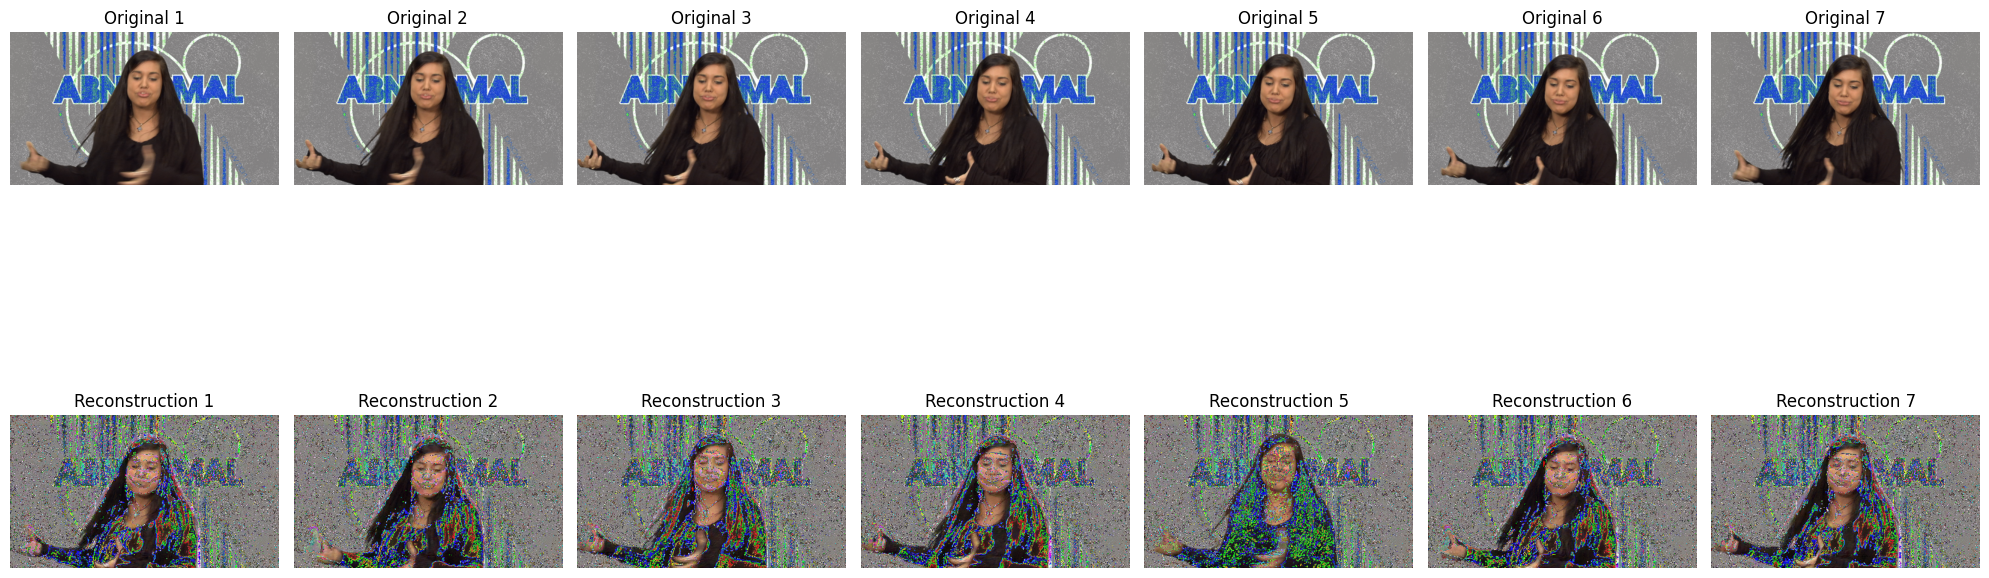

In [15]:
# Display the original and reconstructed images
num_images = len(reconstructions)
fig, axs = plt.subplots(2, num_images, figsize=(20, 10))

for i in range(num_images):
    # Original images
    axs[0, i].imshow(original_images[i])
    axs[0, i].set_title(f"Original {i + 1}")
    axs[0, i].axis('off')

    # Reconstructed images
    axs[1, i].imshow(reconstructions[i])
    axs[1, i].set_title(f"Reconstruction {i + 1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()